# Complex Signal Analysis and Visualization

1. **Parameters**:

   For function we use the following: `dt` is the time step, `f` is the frequency of the signal, and `t` is a time vector. The signal `x` is a complex combination of functions:
   - $ e^{-t^2} \cdot \sin(2\pi f t) $: A Gaussian-modulated sinusoidal wave.
   - $ -0.5 \cdot t^3 $: A cubic term.
   - $ \cos(t^4) $: A cosinusoidal wave of $ t^4 $.
   `N` is the number of samples in the signal `x`.

2. **Construct Analytic Signal**:

   The `hilbert` function computes the Hilbert transform of the signal `x`. The Hilbert transform is a linear operator that produces a signal $ z(t) $ which is the analytic representation of the real signal `x`. The analytic signal $ z(t) $ can be expressed as $ x(t) + j \cdot \hat{x}(t) $ where $ \hat{x}(t) $ is the Hilbert transform of $ x(t) $ and $ j $ is the imaginary unit.

3. **Fourier Transform and Frequency Plot**:
   
   `zh` is the Fourier Transform of the analytic signal. `np.fft.fft` computes the Fourier Transform, and `np.fft.fftshift` shifts the zero-frequency component to the center of the spectrum. `zhspan` calculates the frequency range, and `zhshift` is the magnitude of the Fourier Transform. This segment is crucial for analyzing the frequency components of the signal.

### Key Points:

- **Complex Signal Composition**: Seeing how different mathematical functions combine to form a complex signal.
- **Analytic Signal and Hilbert Transform**: Observing the transformation of a real signal into its analytic form, highlighting amplitude and phase information.
- **Frequency Domain Analysis**: The transformation from time domain to frequency domain and understanding the signal's frequency content.
- **Basis Functions in Signal Processing**: Visualizing the sparsifying base, which is central to understanding signal representations and transformations in signal processing and data analysis.


Text(0.5, 1.0, 'Frequency Hz')

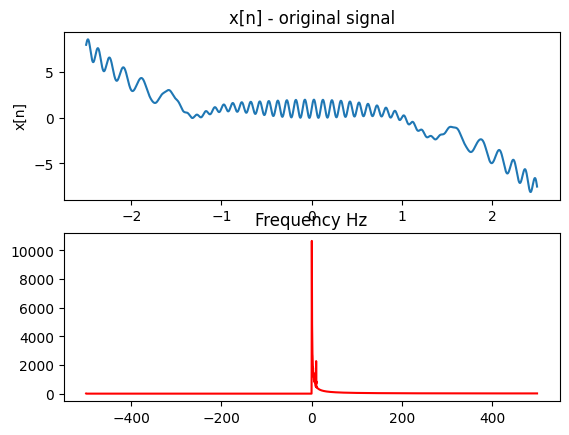

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import fft, ifft


# Define parameters
dt = 0.001
f = 10
t = np.arange(-2.5, 2.5, dt)
x = np.exp(-t**2) * np.sin(2 * np.pi * f * t) - 0.5 * t**3 + np.cos(t**4)
N = len(x)

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('x[n] - original signal')
plt.xlabel('n')
plt.ylabel('x[n]')

# Construct analytic signal
z = hilbert(x)
zh = np.fft.fftshift(np.fft.fft(z))
zhspan = np.arange(-N/2, N/2) / dt / N
zhshift = np.abs(zh)

# Plot the frequency component
plt.subplot(2, 1, 2)
plt.plot(zhspan, zhshift, 'r')
plt.title('Frequency Hz')



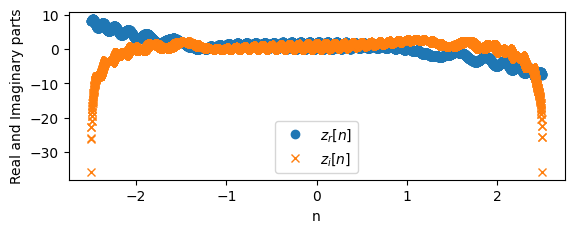

In [11]:

# Plot the real part of the analytic signal
plt.subplot(2, 1, 1)
# plt.plot(t, np.real(z), 'o')
plt.plot(t, np.real(z), 'o', label='$z_r[n]$')
plt.plot(t, np.imag(z), 'x', label='$z_i[n]$')
plt.xlabel('n')
plt.ylabel('Real and Imaginary parts')
plt.legend()


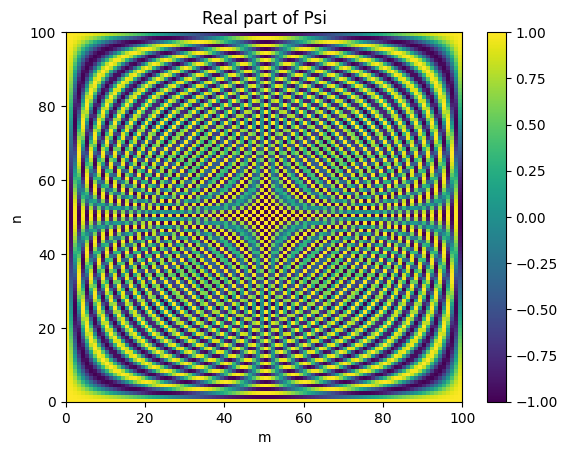

In [13]:

# Sparsifying Base
N = 100
m, n = np.meshgrid(np.arange(N), np.arange(N))
Psi = np.exp(2 * np.pi * 1j * m * n / N)

# Plot the real part of Psi
plt.figure()
plt.pcolor(np.real(Psi))
plt.colorbar()
plt.title('Real part of Psi')
plt.xlabel('m')
plt.ylabel('n')
plt.show()
